combine small txt files with metrics to long table

In [1]:
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#import os
#os.chdir('E:/Master-thesis/7. source code/LiClipse/tspmean/src')
#import viz

metrics_dir='E:/Master-thesis/output/evaluation/metrics/SPLOM/'
metrics_file='metrics_splom.csv'

#all files in the dir
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(metrics_dir) if isfile(join(metrics_dir, f))]

print onlyfiles

if metrics_file in onlyfiles:
    onlyfiles.remove(metrics_file)
      
df_list=[]
    
for filename in onlyfiles:

    df=pd.read_csv(metrics_dir+filename,delimiter=',',header=0)
    df_list.append(df)

df_full=pd.concat(df_list,axis=0)

#print df_full
#df_full.drop('parameter',axis=1,inplace=True)
df_full.reset_index(inplace=True)
df_full.drop('index',axis=1,inplace=True)
#print df_full
#df_em=df_full.loc[(df_full.ordering=='EM') | (df_full.ordering=='EMmanhattan')]
#df = df.drop(df[<some boolean condition>].index)
df_full.drop(df_full[df_full.ordering=='original'].index,inplace=True)
df_full['ratio']=0
df_full['rank']=0
df_full['metric']=df_full['parameter']
df_full.drop('parameter',axis=1,inplace=True)
ordering_methods=df_full.ordering.unique()
datasets=df_full.dataset.unique()

for dataset in datasets:
    #loc metrics for this dataset
    df_dataset=df_full.loc[df_full.dataset==dataset]
    metrics=df_dataset.metric.unique()
    for metric in metrics:
        #find all rows
        data=df_dataset.loc[df_dataset.metric==metric]
        base=data.loc[data.ordering=='random','value'].values[0]
        data.sort_values(by='value',inplace=True)
        #print data
        #print base
        place=1
        for index,row in data.iterrows():
            df_full.loc[index,'ratio']=df_full.loc[index,'value']/base
            df_full.loc[index,'rank']=place
            place+=1
            
print df_full

['aaup_splom.txt', 'abalone_splom.txt', 'auto_splom.txt', 'bike_splom.txt', 'cars_splom.txt', 'community_splom.txt', 'income_splom.txt', 'magic_splom.txt', 'noisy_wave_splom.txt', 'olive_splom.txt', 'parkinson_splom.txt', 'subway_splom.txt', 'waveform_splom.txt', 'wdbc_splom.txt', 'wine_splom.txt', 'yeast_splom.txt']


C:\Users\khamidova\Anaconda2\lib\site-packages\ipykernel\__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


     dataset  ordering     metric      value     ratio  rank
0       aaup      TSNE    pearson  51.179247  0.953124     7
1       aaup      TSNE    stringy   7.828157  1.011877     8
2       aaup      TSNE  monotonic  67.033814  0.854809     7
3       aaup      TSNE     skewed  33.136006  0.968435     1
4       aaup      TSNE     clumpy   0.573703  1.039417     7
5       aaup      TSNE     sparse   0.048425  0.957726     6
6       aaup      TSNE     convex  10.316765  0.934033     6
7       aaup      TSNE   striated   0.342926  1.129135     8
8       aaup      TSNE   outlying   9.157102  1.006976     2
9       aaup      TSNE     skinny  15.899560  1.014794     4
10      aaup    random    pearson  53.696322  1.000000     8
11      aaup    random    stringy   7.736274  1.000000     7
12      aaup    random  monotonic  78.419633  1.000000     8
13      aaup    random     skewed  34.216028  1.000000     7
14      aaup    random     clumpy   0.551947  1.000000     2
15      aaup    random  

Pivot table:
Metrics as columns, datasets and ordering as rows
Save table to Excel sheet

In [5]:
import numpy as np
#change names
df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'
#df_full.loc[df_full['metric']=='fom','metric']='FOM'
#df_full.loc[df_full['metric']=='neumann_stress','metric']='Stress'
#df_full.loc[df_full['metric']=='path_length_euclidian','metric']='LE'
#df_full.loc[df_full['metric']=='path_length_manhattan','metric']='LM'

#df_full['ratio']=df_full['ratio'].apply(lambda x: np.round(x, decimals=3))
df_full['value']=df_full['value'].apply(lambda x: np.round(x, decimals=4))
df_full.loc[df_full['value']>1000,'value']=df_full['value'].apply(lambda x: np.round(x, decimals=2))
data=pd.pivot_table(df_full,values='value',index=['dataset','metric'],columns='ordering')


writer=pd.ExcelWriter('splom.xlsx')
data.to_excel(writer)
writer.close()
data

ordering               EM-euc     EM-man     HC-olo         LK        MDS  \
dataset  metric                                                             
aaup     clumpy        0.5524     0.5640     0.5621     0.5621     0.5926   
         convex        9.4388     9.7302     9.6237     9.6237    10.3466   
         monotonic    53.4100    51.5345    53.9153    53.9153    64.4672   
         outlying      9.6731     9.2084     9.7262     9.7262     9.3833   
         pearson      46.3378    43.9705    46.6292    46.6292    48.3683   
         skewed       33.3517    33.5090    33.2855    33.2855    34.3632   
         skinny       16.1345    15.4878    16.0608    16.0608    15.7326   
         sparse        0.0459     0.0465     0.0457     0.0457     0.0498   
         striated      0.3041     0.2937     0.3059     0.3059     0.3047   
         stringy       6.9965     6.9729     7.4985     7.4985     7.5706   
abalone  clumpy        0.0226     0.0189     0.0231     0.0219     0.0221   
         convex        4.2333     4.4535     4.3484     5.0412     4.0895   
         monotonic    20.7707    19.9019    19.5119    19.7574    20.7717   
         outlying      1.5245     1.6541     1.6032     1.6071     1.4618   
         pearson      22.9332    21.8466    21.8869    22.4558    22.9242   
         skewed       15.0174    15.0702    15.2025    15.0012    14.6258   
         skinny        9.9820     9.7849     9.9583     9.7239    10.1864   
         sparse        0.0108     0.0114     0.0116     0.0115     0.0106   
         striated      0.0751     0.0680     0.0660     0.0648     0.0654   
         stringy       4.0620     3.3019     3.5419     3.6430     3.9715   
auto     clumpy      676.4763   680.4485   648.1214   693.9554   807.9725   
         convex      267.7241   280.8079   304.7260   306.7053   324.9593   
         monotonic  1266.0700  1278.6000  1125.8400  1295.9100  1262.8600   
         outlying   1331.7900  1377.6000  1226.1600  1318.7300  1497.5600   
         pearson    2554.4600  2824.0200  2433.4700  2562.8900  2922.1200   
         skewed     1187.2500  1198.6100  1189.0100  1190.1200  1587.4800   
         skinny     1100.4800  1097.2900  1114.4000  1108.8200  1110.7600   
         sparse     2032.3400  2040.8900  2114.8800  2138.7100  2129.4700   
         striated   1374.6500  1391.6900  1373.8700  1414.7100  1586.9400   
         stringy    1376.1200  1382.4900  1348.2500  1393.2500  1450.5700   
...                       ...        ...        ...        ...        ...   
waveform clumpy        0.0068     0.0067     0.0068     0.0068     0.0067   
         convex       26.1695    26.7703    26.4389    26.4389    27.2174   
         monotonic    17.1254    16.9172    16.0563    16.0563    28.0594   
         outlying      1.3104     1.3317     1.2600     1.2600     1.2996   
         pearson      60.2077    58.1547    38.2138    38.2138   177.8298   
         skewed       33.1466    33.7321    32.4494    32.4494    32.1939   
         skinny       18.8583    18.8385    19.3274    19.3274    18.2004   
         sparse        0.0450     0.0438     0.0438     0.0438     0.0474   
         striated      0.1006     0.1057     0.1050     0.1050     0.1006   
         stringy      11.5871    11.7668    11.7746    11.7746    11.0575   
wdbc     clumpy        0.4130     0.4154     0.4119     0.4131     0.4164   
         convex       47.0536    46.4636    46.3636    45.1727    44.8419   
         monotonic   133.2249   151.3047   145.6106   123.4183   169.7377   
         outlying     32.3087    33.2398    32.7575    34.2308    31.3496   
         pearson     173.6555   199.4144   193.3129   154.1343   204.4063   
         skewed       79.7112    79.5546    79.1473    79.1745    77.7423   
         skinny       45.6718    44.0003    44.5466    44.4650    45.6519   
         sparse        0.1696     0.1662     0.1657     0.1662     0.1691   
         striated      2.3973     2.4233     2.4155     2.4148     2.4149

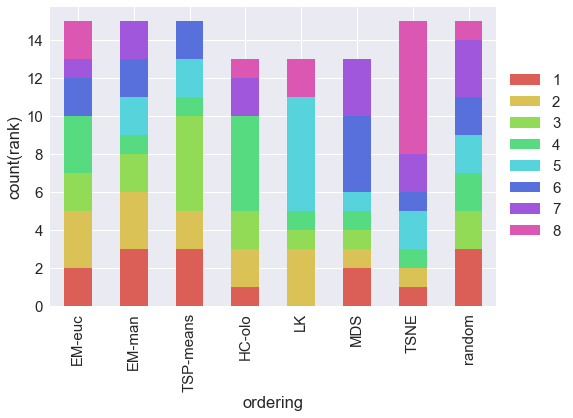

rank   ordering    1    2    3    4    5    6    7    8
0        EM-euc  2.0  3.0  2.0  3.0  NaN  2.0  1.0  2.0
1        EM-man  3.0  3.0  2.0  1.0  2.0  2.0  2.0  NaN
2        HC-olo  1.0  2.0  2.0  5.0  NaN  NaN  2.0  1.0
3            LK  NaN  3.0  1.0  1.0  6.0  NaN  NaN  2.0
4           MDS  2.0  1.0  1.0  1.0  1.0  4.0  3.0  NaN
5          TSNE  1.0  1.0  NaN  1.0  2.0  1.0  2.0  7.0
6     TSP-means  3.0  2.0  5.0  1.0  2.0  2.0  NaN  NaN
7        random  3.0  NaN  2.0  2.0  2.0  2.0  3.0  1.0


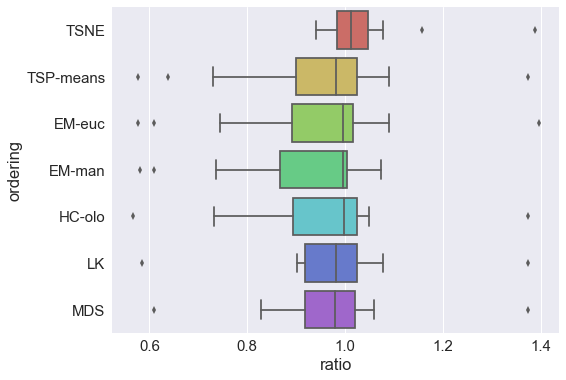

In [21]:
import seaborn as sns
sns.set(font_scale=1.5)
#sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set_palette(sns.color_palette("hls", 8))
#sns.set_palette(sns.color_palette("husl", 8))

df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'

orderings = ['EM-euc', 'EM-man', 'TSP-means', 'HC-olo', 'LK', 'MDS', 'TSNE','random']
mapping = {ordering: i for i, ordering in enumerate(orderings)}

sns.plt.clf()
#sns.plt.cla()
data_plot=df_full.copy()
data_plot=data_plot.loc[data_plot.metric=='stringy']
#clumpy	convex	monotonic	outlying	pearson	skewed	skinny	sparse	striated	stringy
#print data_plot

#print data_plot
data_places=data_plot[['ordering','rank','value']]
data_places=pd.pivot_table(data_places,values='value',index=['ordering'],columns=['rank'],aggfunc='count')
data_places.reset_index(inplace=True)

#data_places.drop('rank',axis=1,inplace=True)
key = data_places['ordering'].map(mapping)
#print key

#Rank stacket barplot
data_places.iloc[key.argsort()].plot(x='ordering',kind='bar', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax=sns.plt.gca()
ax.set(ylabel='count(rank)')
sns.plt.show()

#save data to Excel
print data_places
writer=pd.ExcelWriter('stringy.xlsx')
data_places.iloc[key.argsort()].to_excel(writer)
writer.close()

#EXCLUDE random ordering
data_plot=data_plot.loc[data_plot.ordering!='random']

data_plot5=data_plot.loc[data_plot.metric==5]
data_plot10=data_plot.loc[data_plot.metric==10]
data_plot15=data_plot.loc[data_plot.metric==15]
data_plot20=data_plot.loc[data_plot.metric==20]
data_plot30=data_plot.loc[data_plot.metric==30]

#BOXPLOTS for each metric

fig=sns.plt.figure()
fig.set_size_inches(8, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot)
#sns.plt.xlim(0,1)
sns.plt.show()